# Characterization of Discrete Systems

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Linear Convolution

It was shown previously, that the convolution is an important operation in the theory of signals and linear time-invariant (LTI) systems. The linear convolution of two discrete signals $s[k]$ and $g[k]$ is defined as

\begin{equation}
\sum_{\kappa = -\infty}^{\infty} s[\kappa] \cdot g[k - \kappa] = s[k] * g[k]
\end{equation}

where $*$ is a common short-hand notation of the convolution. The general properties of the linear convolution are discussed, followed by a geometrical interpretation of the operation.

### Properties

For the discrete signals $s[k]$, $g[k]$, $h[k] \in \mathbb{C}$ the convolution shows the following properties 

1. The Dirac impulse is the [identity element](https://en.wikipedia.org/wiki/Identity_element) of the convolution
    \begin{equation}
    s[k] * \delta[k] = s[k]
    \end{equation}
    
2. The convolution is [commutative](https://en.wikipedia.org/wiki/Commutative_property)
    \begin{equation}
    s[k] * g[k] = g[k] * s[k]
    \end{equation}
    
3. The convolution is [associative](https://en.wikipedia.org/wiki/Associative_property)
    \begin{equation}
    \left( s[k] * g[k] \right) * h[k] = s[k] * \left( g[k] * h[k] \right) 
    \end{equation}

5. The convolution is [distributive](https://en.wikipedia.org/wiki/Distributive_property)
    \begin{equation}
    s[k] * \left( g[k] + h[k] \right) = s[k] * g[k] + s[k] * h[k]
    \end{equation}

5. Multiplication with a scalar $a \in \mathbb{C}$
    \begin{equation}
    a \cdot \left( s[k] * g[k] \right) = \left( a \cdot s[k] \right) * g[k] = s[k] * \left( a \cdot g[k] \right)
    \end{equation}

The first property is a consequence of the sifting property of the Dirac pulse, the second to fifth property can be proven by considering the definition of the convolution.

### Geometrical Interpretation

The convolution can be [interpreted in a graphical manner](https://en.wikipedia.org/wiki/Convolution#Visual_explanation). This provides valuable insights into its calculation and allows to estimate the result. The calculation of the linear convolution 

\begin{equation}
y[k] = x[k] * h[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k - \kappa]
\end{equation}


can be decomposed into three steps:

1. substitute $k$ by $\kappa$ in both $x[k]$ and $h[k]$,

2. time-reverse $h[\kappa]$ (reflection at vertical axis),

3. shift $h[- \kappa]$ by $k$ to the right to yield $h[k - \kappa]$, check if it overlaps with $x[\kappa]$ and sum up the product of the overlapping samples.

**Example**

The procedure is illustrated with the signals

\begin{align}
h[k] &= \epsilon[k] \cdot e^{- \frac{k}{2}} \\
x[k] &= \text{rect}_N[k] 
\end{align}

for $N=6$. Before proceeding, some helper functions are defined.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def heaviside(k):
    return np.where(k >= 0, 1.0, 0.0)

def rect(k, N):
    return np.where((0 <= k) & (k < N), 1.0, 0.0)

def plot_signals(k, x, h, xlabel, hlabel, klabel):
    plt.figure(figsize=(8,4))
    plt.stem(k, x, linefmt='b-', markerfmt='bo', label=xlabel)
    plt.stem(k, h, linefmt='r-', markerfmt='ro', label=hlabel)
    plt.xlabel(klabel)
    plt.legend()
    plt.ylim([0, 1.5])

Now let's compute and plot the signals $x[k]$ and $h[k]$

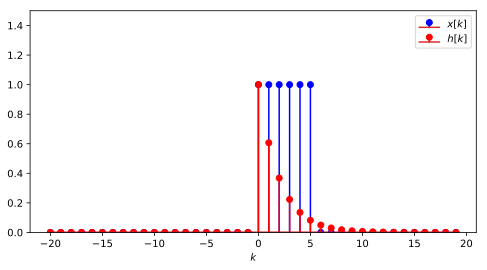

In [3]:
k = np.arange(-20, 20)
h = heaviside(k) * np.exp(- k/2)
x = rect(k, 6)

plot_signals(k, x, h, '$x[k]$', '$h[k]$', '$k$')

The **first step** is to substitute $k$ by $\kappa$ in both $x[k]$ and $h[k]$ to yield $x[\kappa]$ and $h[\kappa]$

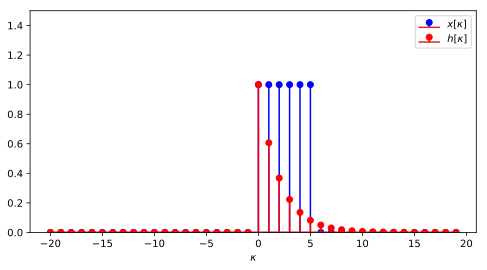

In [4]:
plot_signals(k, x, h, '$x[\kappa]$', '$h[\kappa]$', '$\kappa$')

The **second step** is to time-reverse $h[\kappa]$ to yield $h[-\kappa]$

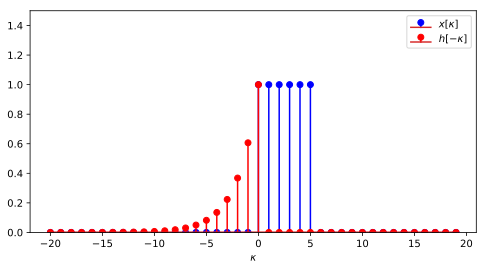

In [5]:
h2 = heaviside(-k) * np.exp(k/2)

plot_signals(k, x, h2, '$x[\kappa]$', '$h[-\kappa]$', '$\kappa$')

The impulse response $h[-\kappa]$ is shifted by $k$ samples to the right in the **third step** to yield $h[k - \kappa]$. This is illustrated for $k = -5$

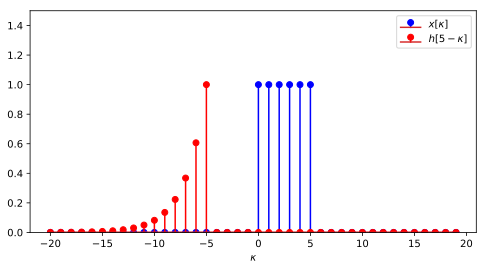

In [6]:
h3 = heaviside(-(k+5)) * np.exp((k+5)/2)

plot_signals(k, x, h3, '$x[\kappa]$', '$h[5 -\kappa]$', '$\kappa$')

It now becomes evident that with respect to the overlap of $h[k -\kappa]$ and $x[\kappa]$ three cases have to be considered:

1. $k<0$: no overlap
2. $0 \leq k < N-1$: partial overlap
3. $k \geq N$: full overlap

The evaluation of the summation for the three cases is left open as an exercise.

### Finite-Length Signals

The length of a discrete signal $x[k]$ is defined as the total number of samples in between the first sample which is not zero and the last sample which is zero, plus one. A signal of finite-length or finite-length signal is a signal whose length is finite. The Dirac impulse $\delta[k]$ is for instance a finite-length signal of length one.

The convolution of two finite-length signals is of practical importance since the convolution can only be evaluated numerically for finite-length signals. Any infinite-length signal can be truncated to a finite length by multiplying it with the rectangular signal $\text{rect}_N[k]$. It is hence sufficient to consider the convolution of two rectangular signals of length $N \in \mathbb{N}$ and $M \in \mathbb{N}$

\begin{equation}
x[k] = \text{rect}_N[k] * \text{rect}_M[k]
\end{equation}

in order to derive insights on the convolution of two arbitrary finite-length signals. By following above geometrical interpretation of the linear convolution, the result for $N \leq M$ can be found as

\begin{equation}
x[k] = \begin{cases}
0 & \text{for }  k < 0 \\
k+1 & \text{for } 0 \leq k < N \\
N & \text{for } N \leq k < M \\
N+M-1-k & \text{for } M \leq k < N+M-1\\
0 & \text{for } k \geq N+M
\end{cases}
\end{equation}

The convolution of two rectangular signals results in a finite-length signal. The length of the signal is $N+M-1$. This result can be generalized to the convolution of two arbitrary finite-length signals by following above reasoning. The convolution of two finite-length signals with length $N$ and $M$, respectively results in a finite-length signal of length $N+M-1$.

For two causal signals $s[k]$ and $g[k]$ of finite length $N$ and $M$ the convolution reads

\begin{equation}
s[k] * g[k] = \sum_{\kappa = 0}^{N-1} s[\kappa] \cdot g[k - \kappa] = \sum_{\kappa = 0}^{M-1} s[k - \kappa] \cdot g[\kappa]
\end{equation}

for $0 \leq k < N+M-1$. The computation of each output sample requires at least $N$ multiplications and $N-1$ additions. The numerical complexity of the convolution for the computation of $N$ output samples is therefore [in the order of](https://en.wikipedia.org/wiki/Big_O_notation) $\mathcal{O} ( N^2 )$.

**Example**

The convolution of two rectangular signals $x[k] = \text{rect}_N[k] * \text{rect}_M[k]$ of length $N$ and $M$ is computed in the following. The resulting signal is plotted for illustration.

(-5, 25)

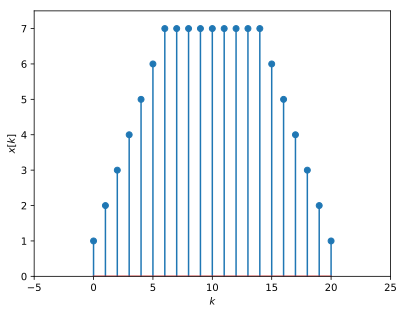

In [7]:
N = 7
M = 15

x = np.convolve(np.ones(N), np.ones(M), mode='full')

plt.stem(x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.ylim([0, N+.5])
plt.xlim([-5, 25])

**Exercise**

* Compute the convolution of two rectangular signals of equal length analytically. Check your results by modifying the numerical example.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.